# Cancer Cell microarray data example

## The NCI60 data

In [31]:
nci_labs = pd.read_csv("nci60_labs.csv", index_col = 0)
nci_data = pd.read_csv("nci60_data.csv", index_col = 0)

In [32]:
print(nci_data.shape) #64 rows, 6830 columns

(64, 6830)


In [ ]:
print(nci_labs.x.value_counts(sort = True))

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: x, dtype: int64


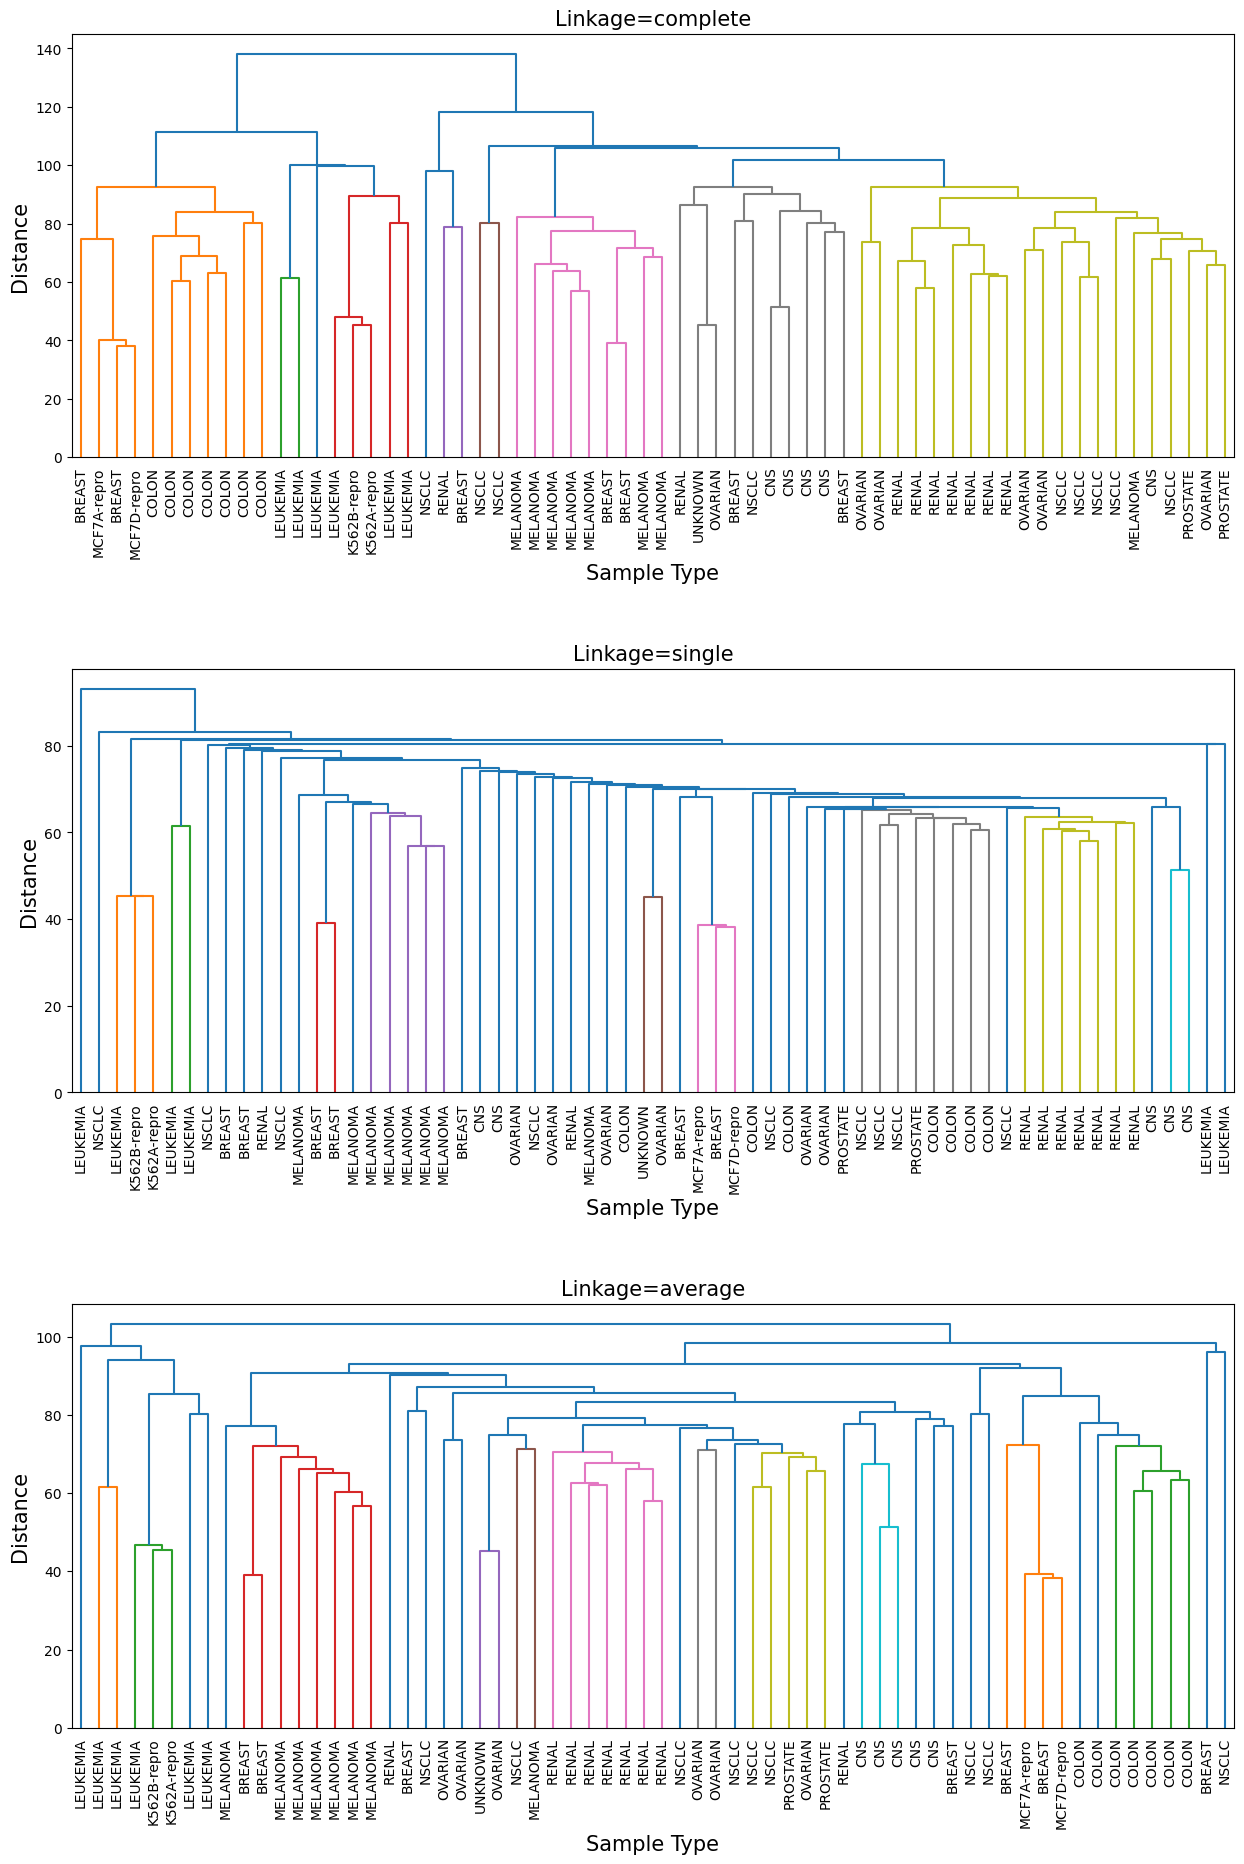

In [39]:
nci_data.index = nci_labs.x

fig, ax = plt.subplots(3,1, figsize=(15,22))
fig.subplots_adjust(hspace=0.5)

linkages = ['complete', 'single', 'average']
for link, axis in zip(linkages, fig.axes):
    hc = linkage(y = nci_data, method = link, metric = 'euclidean')
    axis.set_title("Linkage=%s" % link, size =15)
    axis.set_xlabel('Sample Type', size = 15)
    axis.set_ylabel('Distance', size = 15)
    dendrogram(hc, ax=axis, labels=nci_data.index, leaf_rotation = 90, leaf_font_size =10)
    
plt.show()

In [40]:
nci_hc_complete = linkage( y = nci_data, method = 'complete', metric = 'euclidean')
nci_hc_complete_4_clusters = cut_tree(nci_hc_complete, n_clusters = 4)
print(pd.crosstab(index = nci_data.index,
                  columns = nci_hc_complete_4_clusters.T[0],
                  rownames = ['Cancer Type'],
                  colnames = ['Cluster']))

Cluster      0  1  2  3
Cancer Type            
BREAST       4  1  0  2
CNS          5  0  0  0
COLON        0  0  0  7
K562A-repro  0  0  1  0
K562B-repro  0  0  1  0
LEUKEMIA     0  0  6  0
MCF7A-repro  0  0  0  1
MCF7D-repro  0  0  0  1
MELANOMA     8  0  0  0
NSCLC        8  1  0  0
OVARIAN      6  0  0  0
PROSTATE     2  0  0  0
RENAL        8  1  0  0
UNKNOWN      1  0  0  0


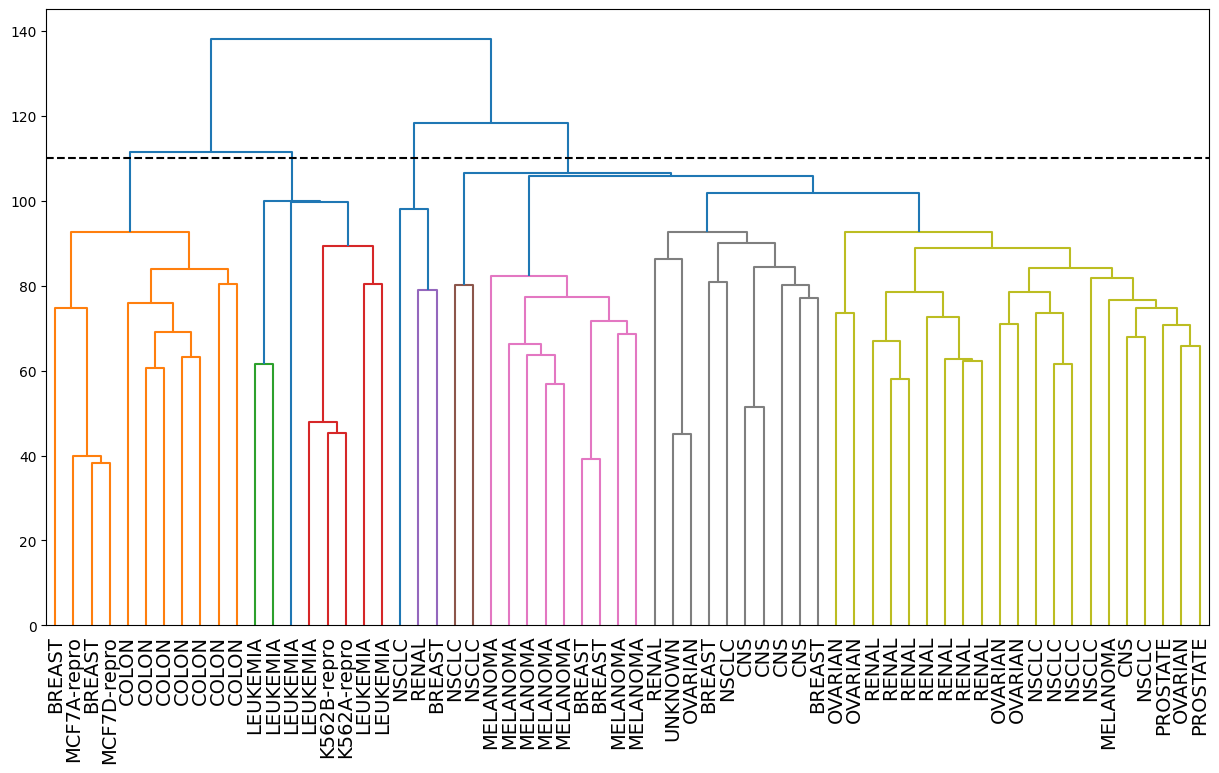

In [41]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
dendrogram(nci_hc_complete,
           labels = nci_data.index,
           leaf_font_size = 14,
           show_leaf_counts = True)
plt.axhline(y = 110, c = 'k', ls = 'dashed')
plt.show()

In [43]:
kmean_4 = KMeans(n_clusters = 4, random_state = 123, n_init = 150)
kmean_4.fit(nci_data)
print(kmean_4.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 2 3 2 2 2 2 3 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1]


In [44]:
print(pd.crosstab(index = kmean_4.labels_,
                  columns = nci_hc_complete_4_clusters.T[0],
                  rownames = ['K-Means'],
                  colnames = ['Hierarchical']))
      

Hierarchical   0  1  2   3
K-Means                   
0              0  0  7   0
1              9  0  0   0
2             25  3  0   0
3              8  0  1  11
